# Questions to Answer with this Data:
1. What are the most important features that users expect in a drink shop mobile application?
2. What are the dealbreakers in using a drink shop mobile application?
3. How does the frequency of visiting a drink shop relate to the importance of different features in a mobile application?
4. How does the frequency of visiting a drink shop relate to the dealbreakers in a mobile application?
5. What is the relationship between the importance of features and the likelihood of using a drink shop mobile application?
6. What is the relationship between the dealbreakers in using an app and the likelihood of using a drink shop mobile application? 

## Other charts:
1. Frequency of visiting a drink shop as a pie chart
2. Mobile app usage as a pie chart
3. Distribution of top features
4. Distribution of dealbreakers
 

In [44]:
import pandas as pd
# read in xlsx file into a dataframe, first row is the header
df = pd.read_excel('survey1cleaned.xlsx')
# print the first 5 rows of the dataframe\
#print(df.iloc[0:5].to_markdown())

print(df.columns)
df.head()


Index(['ID', 'frequency', 'is_mobile_user', 'no_mobile_reason', 'features',
       'dealbreakers', 'prototype'],
      dtype='object')


,ID,frequency,is_mobile_user,no_mobile_reason,features,dealbreakers,prototype
0,1,Once a week,Yes,NaN,Ability to check a gift card balance quickly;A...,The app does not have an easy payment method;T...,NaN
1,2,Once a week,Yes,NaN,Ability to see what others have rated a drink ...,The app crashes or freezes frequently;The app ...,I like how the cart is called the cupholder.
2,3,Once a week,Yes,NaN,Ability to see what others have rated a drink ...,The app crashes or freezes frequently;The app ...,NaN
3,4,Once a month,No,NaN,User interface that is easy to use;Ability to ...,The app does not have an easy payment method;T...,The app looked good. I liked how it was set up.
4,5,A few times a year,No,NaN,Ability to check a gift card balance quickly;A...,The app crashes or freezes frequently;The app ...,I like it...nice and simple. Costs visible. Ea...


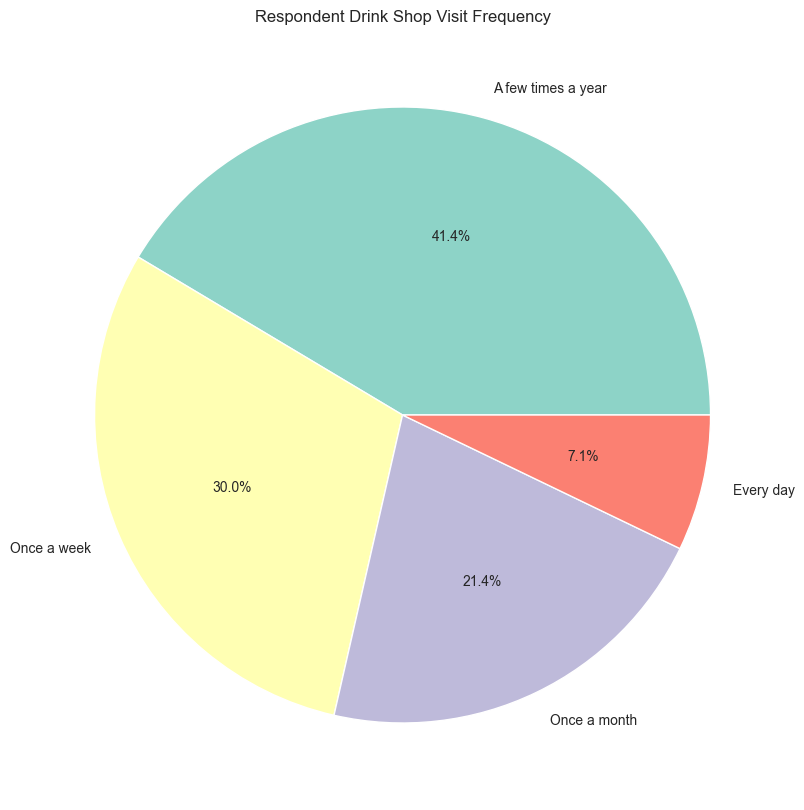

In [35]:
#Frequency of visiting a drink shop as a pie chart
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# create a new dataframe that contains only the frequency column
freq = df[['frequency']]
# display the frequency column as a pie chart
freq['frequency'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10), colors = sns.color_palette("Set3", 10))
plt.ylabel('')
plt.title('Respondent Drink Shop Visit Frequency')
plt.show()

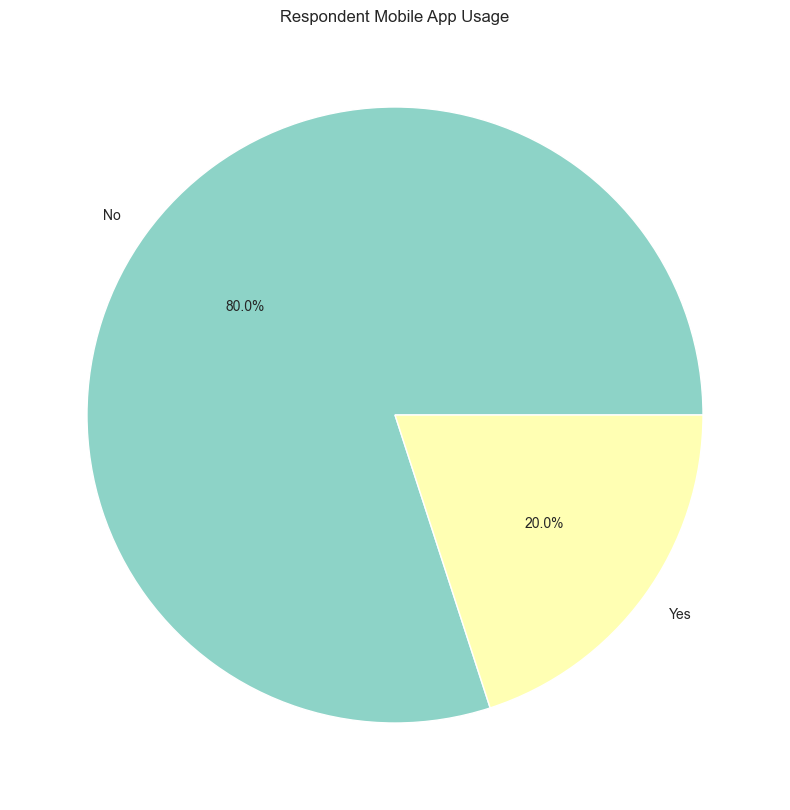

In [36]:
#Mobile app usage as a pie chart
# create a new dataframe that contains only the mobile column
mobile = df[['is_mobile_user']]
# display the mobile column as a pie chart
mobile['is_mobile_user'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,10), colors = sns.color_palette("Set3", 10))
plt.ylabel('')
plt.title('Respondent Mobile App Usage')
plt.show()

C:\Users\CAleb\AppData\Local\Temp\ipykernel_10128\4281811002.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\CAleb\AppData\Local\Temp\ipykernel_10128\4281811002.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\CAleb\AppData\Local\Temp\ipykernel_10128\4281811002.py:8: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

C:\Users\CAleb\AppData\Local\Temp\ipykernel_10128\4281811002.py:8: SettingWithCopyWarning:


A value 

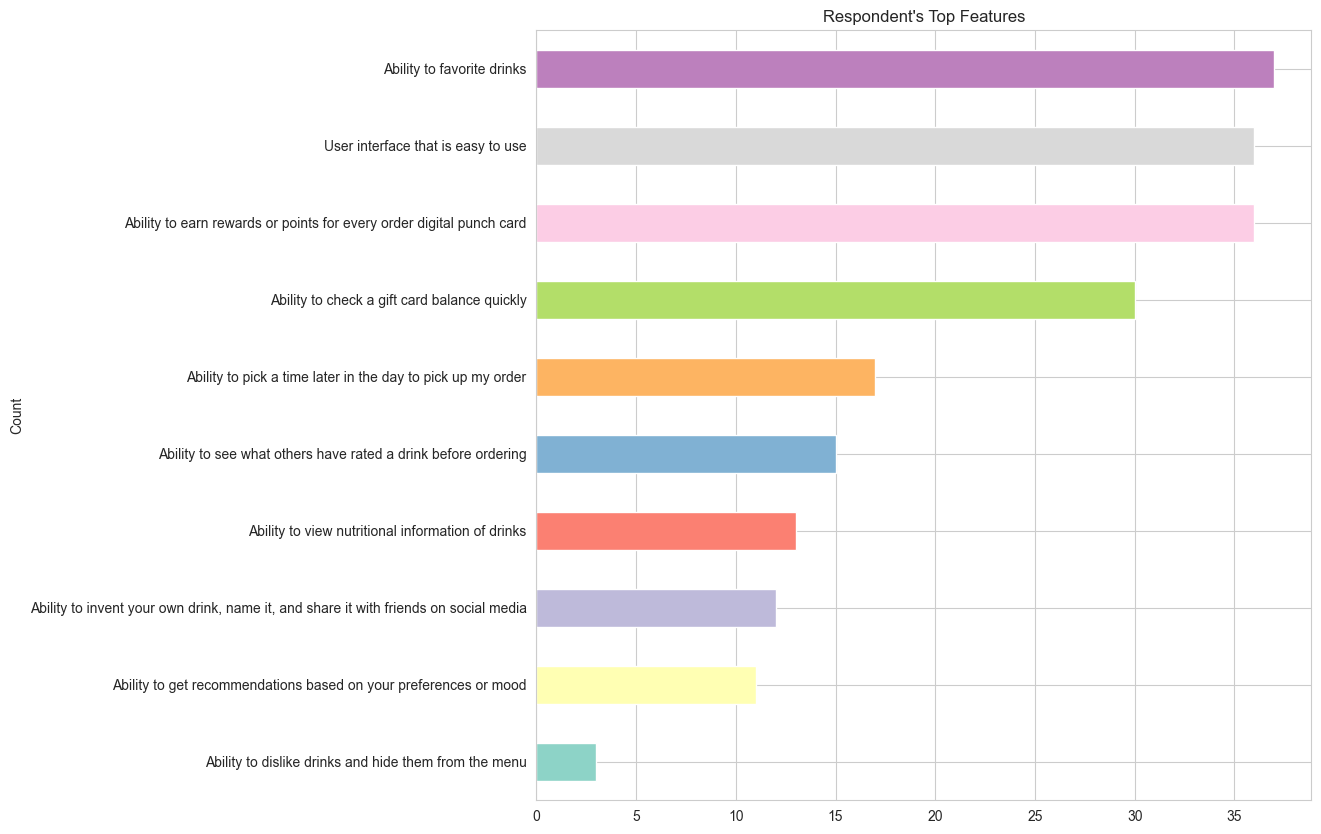

In [85]:
#Distribution of top features
# create a new dataframe that contains only the top features column
top_features = df[['features']]
# split the features column into multiple columns

# replace ( or ) with nothing
top_features['features'] = top_features['features'].str.replace('(','')
top_features['features'] = top_features['features'].str.replace(')','')

for feature in top_features['features']:
    for f in feature.split(';')[:-1]:
        top_features[f] = top_features['features'].str.contains(f).astype(int)
# drop the features column
top_features.drop('features', axis=1, inplace=True)

# show data in a table

#print(top_features.to_markdown())

# display the top features as a bar chart horizontally
top_features.sum().sort_values(ascending=True).plot.barh(figsize=(10,10), color = sns.color_palette("Set3", 10))
plt.ylabel('Count')
plt.title('Respondent\'s Top Features')
plt.show()

In [ ]:
# create new dataframe that contains only the frequency column
dailyweekly = df[['frequency', 'features']]
dealbreakerbyfreq = df[['frequency', 'dealbreakers']]
# split column features into multiple columns by ; delimiter
# make column a 1 if the feature is present, 0 if not
# add new columns to dataframe
for feature in dailyweekly['features']:
    for f in feature.split(';'):
        dailyweekly[f] = dailyweekly['features'].str.contains(f).astype(int)
# drop the features column
dailyweekly.drop('features', axis=1, inplace=True)
dailyweekly.drop('', axis=1, inplace=True)

# do the same for dealbreakers
for dealbreaker in dealbreakerbyfreq['dealbreakers']:
    for d in dealbreaker.split(';'):
        dealbreakerbyfreq[d] = dealbreakerbyfreq['dealbreakers'].str.contains(d).astype(int)
dealbreakerbyfreq.drop('dealbreakers', axis=1, inplace=True)
dealbreakerbyfreq.head()

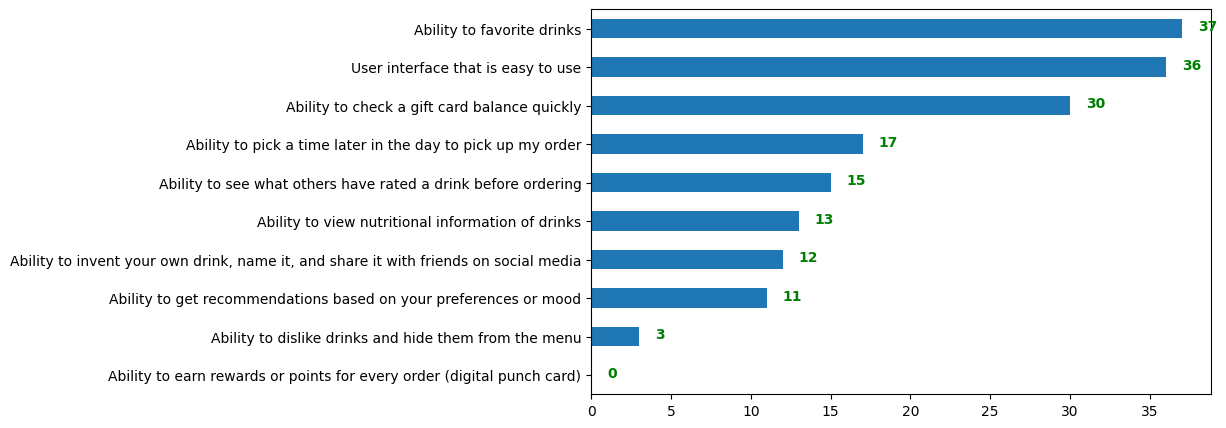

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# graph the sum of each feature, ignore the frequency column and the unlabeled column
# make it horizontal and include the count value on the bar
dailyweekly.iloc[:,1:].sum().sort_values().plot(kind='barh', figsize=(8,5))
for i, v in enumerate(dailyweekly.iloc[:,1:].sum().sort_values()):
    plt.text(v + 1, i - .05 , str(v), color='green', fontweight='bold')
plt.show()

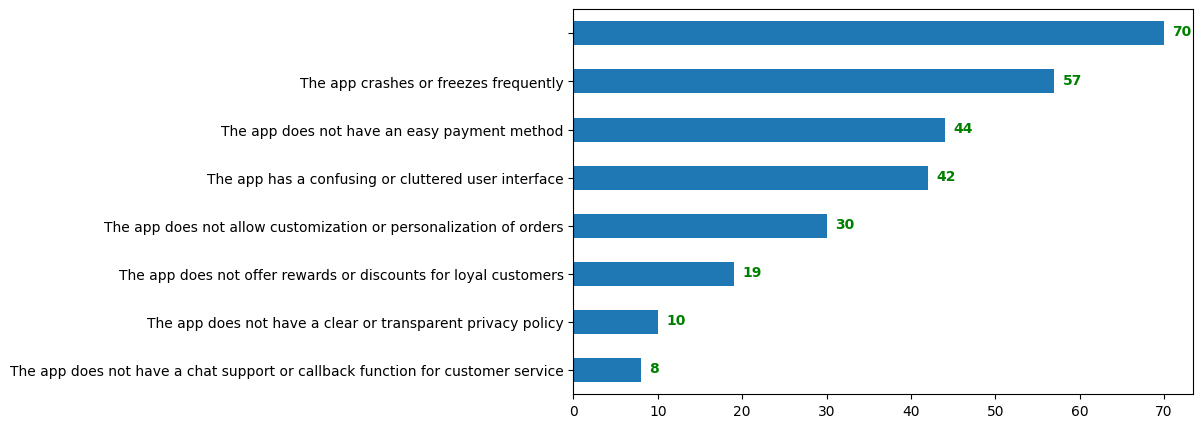

In [ ]:
# graph the sum of each dealbreaker, ignore the frequency column and the unlabeled column
# make it horizontal and include the count value on the bar
dealbreakerbyfreq.iloc[:,1:].sum().sort_values().plot(kind='barh', figsize=(8,5))
for i, v in enumerate(dealbreakerbyfreq.iloc[:,1:].sum().sort_values()):
    plt.text(v + 1, i - .05 , str(v), color='green', fontweight='bold')
plt.show()


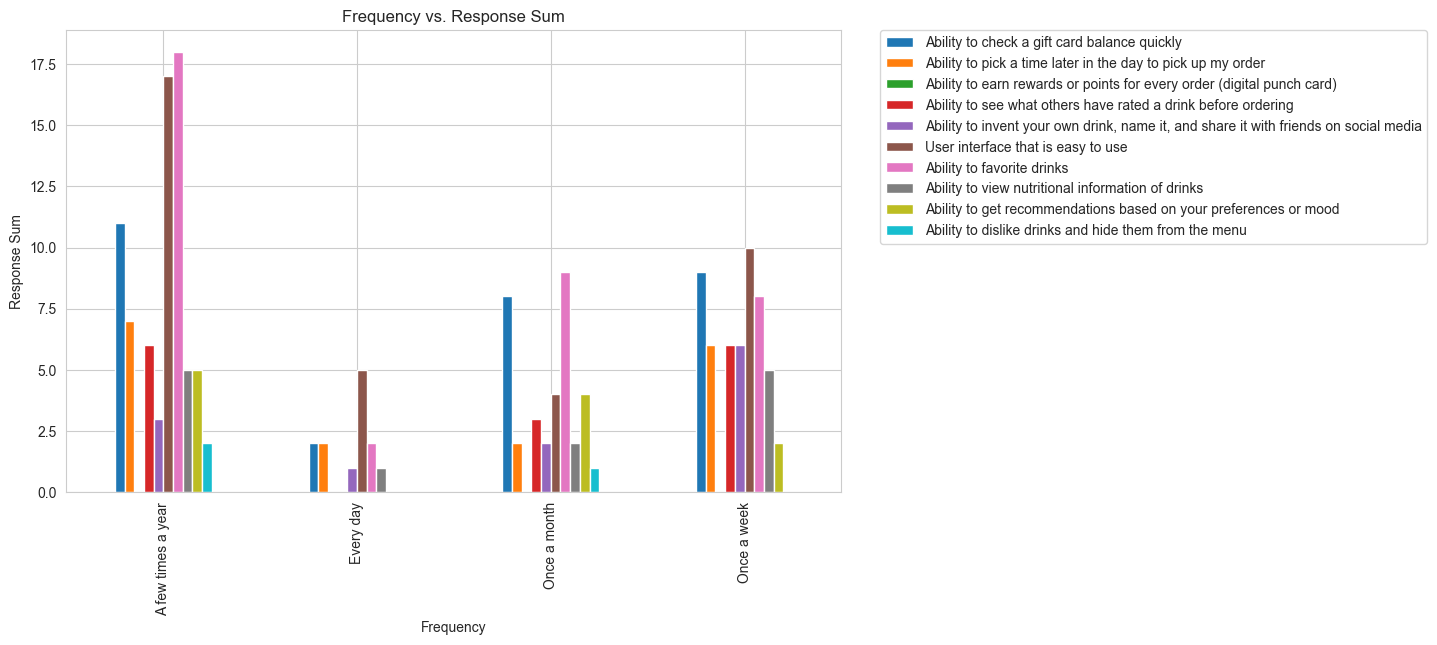

In [ ]:
import seaborn as sns
# value count each feature column grouped by frequency
sum_data = dailyweekly.groupby('frequency').sum()
# make the graph horizontal
sns.set_style('whitegrid')
sum_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Frequency vs. Response Sum')
plt.xlabel('Frequency')
plt.ylabel('Response Sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



In [ ]:
# interactively plot the features grouped by frequency
import plotly.express as px
fig = px.bar(dailyweekly, x="frequency", y=dailyweekly.columns[1:], barmode="group")
fig.update_layout(xaxis_title="Frequency", yaxis_title="Count")
fig.update_layout(title_text='Frequency of Soda Shack Visits and Requested Features')
fig.update_layout(legend_title_text='Features')
fig.show()

In [ ]:
# interactively plot the features
import plotly.express as px
dailyweekly = featurebyfreq[(featurebyfreq['frequency'] == 'Every day') | (featurebyfreq['frequency'] == 'Once a week')]
# graph totals of each feature
fig = px.bar(dailyweekly, x="frequency", y=dailyweekly.columns[1:], barmode="group")
fig.update_layout(xaxis_title="Frequency", yaxis_title="Count")
fig.update_layout(title_text='Frequency of Soda Shack Visits and Requested Features')
fig.update_layout(legend_title_text='Features')
fig.show()


NameError: name 'featurebyfreq' is not defined